In [1]:
import numpy as np
from hamiltonian import *
from reconstruct_lcu import *
from continuers import *
from qsearch_bundle_circuit import *
import pickle

In [2]:
# filename_qsim = "results/LCU/countsNsite=2Bx=0.1J=-1pbc=FalseBztrain[0, 1.3]Bztarget[1.5, 1.7, 1.9]backend_name=qasm_simulatorlayout=[0, 1, 2]opt=3date23_2_2022.p"
# filename_ibmqsim_13 = "results/LCU/countsNsite=2Bx=0.1J=-1pbc=FalseBztrain[0.1, 1.3]Bztarget[0.3, 0.5, 0.7, 1.1, 1.5, 1.7, 1.9]backend_name=ibmq_qasm_simulatorlayout=[1, 2, 3]shots=8192opt=3date25_2_2022.p"
filename_ibmqsim_13 = "results/LCU/countsNsite=2Bx=0.1J=-1pbc=FalseBztrain[0.1, 1.3]Bztarget[0.3, 0.5, 0.7, 1.1, 1.5, 1.7, 1.9]backend_name=ibmq_qasm_simulatorlayout=[0, 1, 2]shots=20000opt=3date18_4_2022.p"
# filename_bogota_13 = "results/LCU/countsNsite=2Bx=0.1J=-1pbc=FalseBztrain[0.1, 1.3]Bztarget[0.3, 0.5, 0.7, 1.1, 1.5, 1.7, 1.9]backend_name=ibmq_bogotalayout=[1, 2, 3]shots=8192opt=3date25_2_2022.p"
filename_bogota_13 = "results/LCU/countsNsite=2Bx=0.1J=-1pbc=FalseBztrain[0.1, 1.3]Bztarget[0.3, 0.5, 0.7, 1.1, 1.5, 1.7, 1.9]backend_name=ibmq_bogotalayout=[1, 2, 3]shots=20000opt=3date25_2_2022.p"
filename_manila_13 = "results/LCU/countsNsite=2Bx=0.1J=-1pbc=FalseBztrain[0.1, 1.3]Bztarget[0.3, 0.5, 0.7, 1.1, 1.5, 1.7, 1.9]backend_name=ibmq_manilalayout=[2, 3, 4]shots=20000opt=3date25_2_2022.p"
filename_montreal_13 = "results/LCU/countsNsite=2Bx=0.1J=-1pbc=FalseBztrain[0.1, 1.3]Bztarget[0.3, 0.5, 0.7, 1.1, 1.5, 1.7, 1.9]backend_name=ibmq_montreallayout=[0, 1, 2]shots=20000opt=3date28_3_2022.p"

In [3]:
filename_ibmqsim_19 = "results/LCU/countsNsite=2Bx=0.1J=-1pbc=FalseBztrain[0.1, 1.9]Bztarget[0.3, 0.5, 0.7, 1.1, 1.3, 1.5, 1.7]backend_name=qasm_simulatorlayout=[2, 3, 4]shots=20000opt=3date25_2_2022.p"
filename_montreal_19 = "results/LCU/countsNsite=2Bx=0.1J=-1pbc=FalseBztrain[0.1, 1.9]Bztarget[0.3, 0.5, 0.7, 1.1, 1.3, 1.5, 1.7]backend_name=ibmq_montreallayout=[0, 1, 2]shots=20000opt=3date26_2_2022.p"
filename_manila_19 = "results/LCU/countsNsite=2Bx=0.1J=-1pbc=FalseBztrain[0.1, 1.9]Bztarget[0.3, 0.5, 0.7, 1.1, 1.3, 1.5, 1.7]backend_name=ibmq_manilalayout=[2, 3, 4]shots=20000opt=3date25_2_2022.p"

In [4]:
# def write():
#     data = np.genfromtxt(filename, usecols=(0,1,2,3,4,5))
#     data = data.T
#     Bzarray = data[0]
#     mavgarray = data[1]
#     mstderrorarray = data[2]
#     mmeasuredreadout = data[3]
#     scaledmarray  = data[4]
#     scaledmstderrorarray = data[5]
    
#     data = np.array([Bzarray, mavgarray,mstdarray,mmeasuredreadout,scaledmarray,scaledmstdarray])
#     data = data.T
#     datafile_id=filename
#     np.savetxt(datafile_id, data, fmt=['%f','%f','%f','%f','%f','%f'])

# def read_mavg_mstderror_fromfile(filename):
#     filename = "paper_figures/data/" +filename
#     data = np.genfromtxt(filename, usecols=(0,1,2,3,4,5))
#     data = data.T
#     Bzarray = data[0]
#     mavgarray = data[1]
#     mstderrorarray = data[2]
#     mmeasuredreadout = data[3]
#     scaledmarray  = data[4]
#     scaledmstderrorarray = data[5]
    
#     return Bzarray,mavgarray,mstderrorarray,mmeasuredreadout,scaledmarray,scaledmstderrorarray

In [5]:
def getting_lcu_data_forplots(filename,Bzmin=-2,Bzmax=2,machine="bogota", write = False):
    counts_read = pickle.load(open(filename,"rb"))
    [allcounts, cal_matrix, mitigated_counts,meta_data] = counts_read
    [N,J,pbc,Bx,Bzlist_training,Bzlist_target ] = meta_data
    
    fig, ax, Bzlist, eval_stor = show_XY_spectrum(N=N, Bzmin=Bzmin, Bzmax=Bzmax, Bx=Bx,J=J,pbc=pbc)
    LCU_E_list_qsearch,LCU_m_list_qsearch = get_Energy_mag_list(countstog = mitigated_counts,Bx=Bx,J=J,Bzlist_target=Bzlist_target)
    training_paramlist = [[J,Bx,Bz,N,pbc] for Bz in Bzlist_training]
    target_paramlist = [[J,Bx,Bz,N,pbc] for Bz in Bzlist_target]    
    vectorspace = vector_methods(XY_hamiltonian)
    EVcontinuer = vector_continuer(vectorspace,
                                   XY_hamiltonian,
                                   Mag_op,
                                   training_paramlist,
                                   target_paramlist,
                                   N)
    EVcontinuer.get_base_eigenvectors()
    EVcontinuer.get_target_eigenvectors(ortho=False)
    print("\ntraining_paramlist---", training_paramlist)
    fig,ax = plt.subplots()
    for j in range(2**N):
        ax.plot(Bzlist,eval_stor[:,j],'k-')
    if 'ax' in locals():
        print("es")
        ax.plot(Bzlist_target,np.real(LCU_E_list_qsearch),'s',color="red")
    if 'ax' in locals():
        for ip in range(len(training_paramlist)):
            ax.plot(Bzlist_target,np.real(EVcontinuer.target_evals[:,ip]),'o',color="b")
            
    ##### mag
    fig, ax, Bzlist, mag_stor = show_XY_magnetization(N=N,Bzmin=Bzmin,Bzmax=Bzmax,Bx=Bx,J=J,pbc=pbc)
    fig,ax = plt.subplots()
    for j in range(2**N):
        ax.plot(Bzlist,mag_stor[:,j],'k-')
    if 'ax' in locals():
        # print("es")
        ax.plot(Bzlist_target,np.real(LCU_m_list_qsearch),'s',color="red")
    if 'ax' in locals():
        for ip in range(len(training_paramlist)):
            ax.plot(Bzlist_target,np.real(EVcontinuer.target_magnetization[:,ip]),'o',color="b")
    if(write):
        data_exact = np.array([Bzlist,eval_stor[:,0],eval_stor[:,1],eval_stor[:,2],eval_stor[:,3]])
        data_exact = data_exact.T
        filenameExact="paper_figures/plot_data/Exact_BzvsE_LCUN_"+str(N)+"siteXY_J="+str(J)+"_Bzmax="+str(Bzmax)+\
                "_Bzmin="+str(Bzmin)+"Bx="+str(Bx)+".dat"
        np.savetxt(filenameExact, data_exact, fmt=['%f','%f','%f','%f','%f'])
        ####################
        data_ed = np.array([Bzlist_target,np.real(EVcontinuer.target_evals[:,0]),np.real(EVcontinuer.target_evals[:,1])])
        # print(EVcontinuer.target_evals[:,0],EVcontinuer.target_evals[:,1])
        data_ed  = data_ed.T
        filenameed="paper_figures/plot_data/ed_BzvsE_LCUN_"+str(N)+"siteXY_J="+str(J)+"_Bzmax="+str(Bzmax)+\
                "_Bzmin="+str(Bzmin)+"Bx="+str(Bx)+"_Bzlist_training="+str(Bzlist_training)+".dat"
        np.savetxt(filenameed, data_ed, fmt=['%f','%f','%f'])
        ###########
        data_machine = np.array([Bzlist_target,np.real(LCU_E_list_qsearch),np.real(LCU_m_list_qsearch)])
        data_machine = data_machine.T
        filenamemachine="paper_figures/plot_data/"+str(machine)+"_BzvsEm_LCUN_"+str(N)+"siteXY_J="+str(J)+"_Bzmax="+str(Bzmax)+\
                "_Bzmin="+str(Bzmin)+"Bx="+str(Bx)+"_Bzlist_training="+str(Bzlist_training)+".dat"
        np.savetxt(filenamemachine, data_machine, fmt=['%f','%f','%f'])
        ##########
        ###########################
        data = np.array([Bzlist,np.real(mag_stor[:,0]),np.real(mag_stor[:,1]),np.real(mag_stor[:,2]),np.real(mag_stor[:,3])])
        data = data.T
        filenameExact="paper_figures/plot_data/ExactBzvsm_LCUN_"+str(N)+"siteXY_J="+str(J)+"_Bzmax="+str(Bzmax)+\
                "_Bzmin="+str(Bzmin)+"Bx="+str(Bx)+".dat"
        np.savetxt(filenameExact, data, fmt=['%f','%f','%f','%f','%f'])
        ###########
        # data_machine = np.array([Bzlist_target,np.real(LCU_E_list_qsearch),np.real(LCU_m_list_qsearch)])
        # data_machine = data_machine.T
        # filenamemachine="paper_figures/plot_data/"+str(machine)+"BzvsEm_LCUN_"+str(N)+"siteXY_J="+str(J)+"_Bzmax="+str(Bzmax)+\
        #         "_Bzmin="+str(Bzmin)+"Bx="+str(Bx)+".dat"
        # np.savetxt(filenamemachine, data_machine, fmt=['%f','%f','%f'])
        ##########
        data_ed = np.array([Bzlist_target,np.real(EVcontinuer.target_magnetization[:,0]),np.real(EVcontinuer.target_magnetization[:,1])])
        data_ed  = data_ed.T
        filenameed="paper_figures/plot_data/"+str(machine)+"BzvsEm_LCUN_"+str(N)+"siteXY_J="+str(J)+"_Bzmax="+str(Bzmax)+\
                "_Bzmin="+str(Bzmin)+"Bx="+str(Bx)+"_Bzlist_training="+str(Bzlist_training)+".dat"
        np.savetxt(filenameed, data_ed, fmt=['%f','%f','%f'])
        #############
        energylist_training = []
        for i in range(len(Bzlist_training)):
            ham0 = XY_hamiltonian(J=J,Bz=Bzlist_training[i],Bx=Bx,N=N,pbc=pbc)
            eval_tr0 = np.linalg.eigvalsh(ham0)
            energylist_training.append(eval_tr0[0])
        data_tr = np.array([Bzlist_training,energylist_training])
        data_tr  = data_tr.T
        filenametr="paper_figures/plot_data/training"+str(Bzlist_training)+"BzvsE_LCUN_"+str(N)+"siteXY_J="+str(J)+"_Bzmax="+str(Bzmax)+\
                "_Bzmin="+str(Bzmin)+"Bx="+str(Bx)+".dat"
        np.savetxt(filenametr, data_tr, fmt=['%f','%f'])
            
        
                                 
    # print("Errors")
    # print(np.imag(EVcontinuer.target_evals))
    # print(np.imag(LCU_E_list_qsearch))
    # print(np.imag(LCU_m_list_qsearch))
    

[-1, 0.1, 0.1, 2, False]
Adding vector for parameter set [-1, 0.1, 0.1, 2, False]
[-1, 0.1, 1.3, 2, False]
Adding vector for parameter set [-1, 0.1, 1.3, 2, False]

basis continuer:
[ 0.06338421+0.j -0.70356409+0.j -0.70356409+0.j  0.07731482+0.j]
[-0.00593814+0.j  0.15533724+0.j  0.15533724+0.j -0.97555391+0.j]
overlap_matrix_continuer:
  [[ 1.        +0.j -0.29438056+0.j]
 [-0.29438056-0.j  1.        +0.j]]
Hamiltonian_continuer:
  [[-2.02078205+0.j  0.62466751+0.j]
 [ 0.62466751-0.j -0.72850563+0.j]]
fullvec
[-0.06308015+0.j  0.70222138+0.j  0.70222138+0.j -0.09895023+0.j]
overlap_matrix_continuer:
  [[ 1.        +0.j -0.29438056+0.j]
 [-0.29438056-0.j  1.        +0.j]]
Hamiltonian_continuer:
  [[-2.02156606+0.j  0.65468687+0.j]
 [ 0.65468687-0.j -1.1091737 +0.j]]
fullvec
[-0.06247528+0.j  0.69906782+0.j  0.69906782+0.j -0.13676699+0.j]
overlap_matrix_continuer:
  [[ 1.        +0.j -0.29438056+0.j]
 [-0.29438056-0.j  1.        +0.j]]
Hamiltonian_continuer:
  [[-2.02235007+0.j  0.684

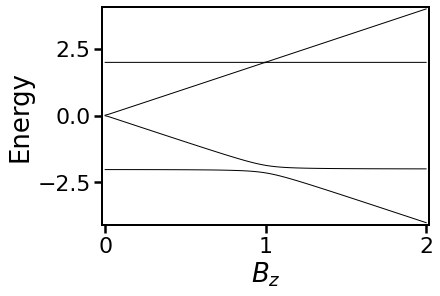

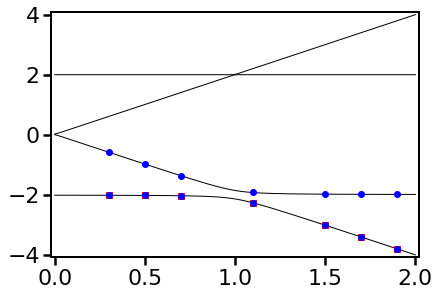

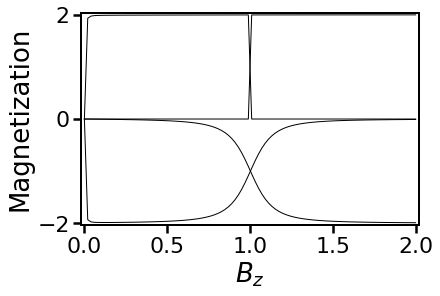

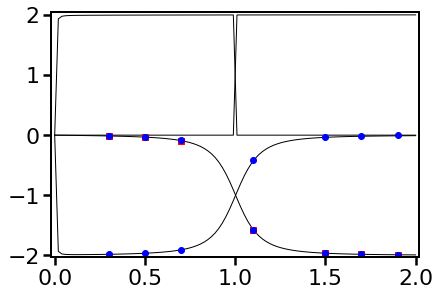

In [100]:
getting_lcu_data_forplots(filename=filename_ibmqsim_13, Bzmin=0,machine="ibmqsim", write = True)
# getting_lcu_data_forplots(filename=filename_bogota_13, Bzmin=0,machine="bogota", write = True)
# getting_lcu_data_forplots(filename = filename_montreal_13, Bzmin=0,machine = "montreal", write = True)
# getting_lcu_data_forplots(filename = filename_manila_13, Bzmin=0,machine = "manila", write = True)

# getting_lcu_data_forplots(filename=filename_ibmqsim_19, Bzmin=0,machine="ibmqsim", write = True)
# getting_lcu_data_forplots(filename = filename_manila_19, Bzmin=0,machine = "manila", write = True)
# getting_lcu_data_forplots(filename = filename_montreal_19, Bzmin=0,machine = "montreal", write = True)

In [6]:
# filename_evc_qsim = "results/EVC/countsNsite=2Bx=0.1J=-1pbc=FalseBztrain[0.1, 1.3]Bztarget[1.5, 1.7, 1.9]backend_name=qasm_simulatorlayout=[0, 1, 2]shots=8192opt=3.p"
# filename_evc_ibmqsim13 = "results/EVC/countsNsite=2Bx=0.1J=-1pbc=FalseBztrain[0.1, 1.3]Bztarget[0.5, 0.7, 1.1, 1.5, 1.7, 1.9]backend_name=ibmq_qasm_simulatorlayout=[1, 2, 3]shots=8192opt=3date25_2_2022.p"
filename_evc_ibmqsim13 = "results/EVC/countsNsite=2Bx=0.1J=-1pbc=FalseBztrain[0.1, 1.3]Bztarget[0.3, 0.5, 0.7, 1.1, 1.5, 1.7, 1.9]backend_name=ibmq_qasm_simulatorlayout=[0, 1, 2]shots=20000opt=3date18_4_2022.p"
# filename_evc_qsim13 = "results/EVC/countsNsite=2Bx=0.1J=-1pbc=FalseBztrain[0.1, 1.3]Bztarget[1.5, 1.7, 1.9]backend_name=qasm_simulatorlayout=[0, 1, 2]shots=8192opt=3.p"
# filename_evc_bogota = "results/EVC/countsNsite=2Bx=0.1J=-1pbc=FalseBztrain[0.1, 1.3]Bztarget[0.3, 0.5, 0.7, 1.1, 1.5, 1.7, 1.9]backend_name=ibmq_bogotalayout=[1, 2, 3]shots=8192opt=3date25_2_2022.p"
filename_evc_bogota13 = "results/EVC/countsNsite=2Bx=0.1J=-1pbc=FalseBztrain[0.1, 1.3]Bztarget[0.3, 0.5, 0.7, 1.1, 1.5, 1.7, 1.9]backend_name=ibmq_bogotalayout=[1, 2, 3]shots=20000opt=3date25_2_2022.p"
filename_evc_manila13 = "results/EVC/countsNsite=2Bx=0.1J=-1pbc=FalseBztrain[0.1, 1.3]Bztarget[0.3, 0.5, 0.7, 1.1, 1.5, 1.7, 1.9]backend_name=ibmq_manilalayout=[2, 3, 4]shots=20000opt=3date25_2_2022.p"

filename_evc_ibmqsim19 = "results/EVC/countsNsite=2Bx=0.1J=-1pbc=FalseBztrain[0.1, 1.9]Bztarget[0.3, 0.5, 0.7, 1.1, 1.3, 1.5, 1.7]backend_name=qasm_simulatorlayout=[2, 3, 4]shots=20000opt=3date25_2_2022.p"
filename_evc_manila19 = "results/EVC/countsNsite=2Bx=0.1J=-1pbc=FalseBztrain[0.1, 1.9]Bztarget[0.3, 0.5, 0.7, 1.1, 1.3, 1.5, 1.7]backend_name=ibmq_manilalayout=[2, 3, 4]shots=20000opt=3date25_2_2022.p"
filename_evc_montreal19 = "results/EVC/countsNsite=2Bx=0.1J=-1pbc=FalseBztrain[0.1, 1.9]Bztarget[0.3, 0.5, 0.7, 1.1, 1.3, 1.5, 1.7]backend_name=ibmq_montreallayout=[0, 1, 2]shots=20000opt=3date25_2_2022.p"

In [7]:
# def getting_EVC_data_forplots(filename,Bzmin=-2,Bzmax=2, write = False):
    
#     counts_read = pickle.load(open(filename,"rb"))
#     [allcounts, cal_matrix, mitigated_counts, plist, meta_data] = counts_read
#     [N,J,pbc,Bx,Bzlist_training,Bzlist_target ] = meta_data
    
#     fig, ax, Bzlist, eval_stor = show_XY_spectrum(N=N, Bzmin=Bzmin, Bzmax=Bzmax, Bx=Bx,J=J,pbc=pbc)
    
#     overlap_matrix_bundle, Bzmatrix_bundle, Bxmatrix_bundle, Jmatrix_bundle =  unpackplist(plist=plist, N=N, pbc=pbc, basis_length=len(Bzlist_training))
#     evals_qc_bundle = np.zeros([len(Bzlist_target),len(Bzlist_training)],dtype=complex)
#     target_paramlist = [{"J":J,"Bx":Bx,"Bz":Bz,"N":N,"pbc":pbc} for Bz in Bzlist_target]
#     for ip, paramn in enumerate(target_paramlist):
#         evals_bundle,evecs_bundle = get_evals_of_target_ham_from_matrices(overlap_matrix=overlap_matrix_bundle, Bzmatrix=Bzmatrix_bundle, Bxmatrix=Bxmatrix_bundle,\
#                  Jmatrix=Jmatrix_bundle, paramn=paramn)
#         for k in range(len(Bzlist_training)):
#             evals_qc_bundle[ip, k] = evals_bundle[k]
        
#     training_paramlist = [[J,Bx,Bz,N,pbc] for Bz in Bzlist_training]
#     target_paramlist = [[J,Bx,Bz,N,pbc] for Bz in Bzlist_target]    
#     vectorspace = vector_methods(XY_hamiltonian)
#     EVcontinuer = vector_continuer(vectorspace,
#                                    XY_hamiltonian,
#                                    Mag_op,
#                                    training_paramlist,
#                                    target_paramlist,
#                                    N)
#     EVcontinuer.get_base_eigenvectors()
#     EVcontinuer.get_target_eigenvectors(ortho=False)
    
#     fig,ax = plt.subplots()
#     for j in range(2**N):
#         ax.plot(Bzlist,eval_stor[:,j],'k-')
#     if 'ax' in locals():
#         print("es")
#         ax.plot(Bzlist_target,np.real(evals_qc_bundle),'s',color="red")
#     if 'ax' in locals():
#         for ip in range(len(training_paramlist)):
#             ax.plot(Bzlist_target,np.real(EVcontinuer.target_evals[:,ip]),'o',color="b")
            

In [8]:
# getting_EVC_data_forplots(filename=filename_evc_qsim, write = False)
# getting_EVC_data_forplots(filename=filename_evc_bogota, write = False)

In [9]:
def getting_EVC_data_forplots(filename, Bzmin=-2.0, Bzmax=2, machine="",moretargets=True, write = False):
    
    counts_read = pickle.load(open(filename,"rb"))
    [allcounts, cal_matrix, mitigated_counts, plist, meta_data] = counts_read
    [N,J,pbc,Bx,Bzlist_training,Bzlist_target ] = meta_data
    if(moretargets):
        Bzlist_target = np.linspace(0.0,2.0,50)
        
    fig, ax, Bzlist, eval_stor = show_XY_spectrum(N=N, Bzmin=Bzmin, Bzmax=Bzmax, Bx=Bx,J=J,pbc=pbc)
    
    overlap_matrix_bundle, Bzmatrix_bundle, Bxmatrix_bundle, Jmatrix_bundle =  unpackplist(plist=plist, N=N, pbc=pbc, basis_length=len(Bzlist_training))
    evals_qc_bundle = np.zeros([len(Bzlist_target),len(Bzlist_training)],dtype=complex)
    
    target_paramlist = [{"J":J,"Bx":Bx,"Bz":Bz,"N":N,"pbc":pbc} for Bz in Bzlist_target]
    
    # if(moretargets):
    #     Bzlist_target_more = np.linspace(0.1,1.9,50)
    #     target_paramlist = [{"J":J,"Bx":Bx,"Bz":Bz,"N":N,"pbc":pbc} for Bz in Bzlist_target_more]
    #     evals_qc_bundle = np.zeros([len(Bzlist_target_more),len(Bzlist_training)],dtype=complex)
    # else:
    #     target_paramlist = [{"J":J,"Bx":Bx,"Bz":Bz,"N":N,"pbc":pbc} for Bz in Bzlist_target]
    
    
    for ip, paramn in enumerate(target_paramlist):
        evals_bundle,evecs_bundle = get_evals_of_target_ham_from_matrices(overlap_matrix=overlap_matrix_bundle, Bzmatrix=Bzmatrix_bundle, Bxmatrix=Bxmatrix_bundle,\
                 Jmatrix=Jmatrix_bundle, paramn=paramn)
        for k in range(len(Bzlist_training)):
            evals_qc_bundle[ip, k] = evals_bundle[k]
        
    training_paramlist = [[J,Bx,Bz,N,pbc] for Bz in Bzlist_training]
    target_paramlist = [[J,Bx,Bz,N,pbc] for Bz in Bzlist_target]    
    vectorspace = vector_methods(XY_hamiltonian)
    EVcontinuer = vector_continuer(vectorspace,
                                   XY_hamiltonian,
                                   Mag_op,
                                   training_paramlist,
                                   target_paramlist,
                                   N)
    EVcontinuer.get_base_eigenvectors()
    EVcontinuer.get_target_eigenvectors(ortho=False)
    
    fig,ax = plt.subplots(figsize=(8,6))
    for j in range(2**N):
        ax.plot(Bzlist,eval_stor[:,j],'k-')
    if 'ax' in locals():
        ax.plot(Bzlist_target,np.real(evals_qc_bundle),'^',color="red")
    if 'ax' in locals():
        for ip in range(len(training_paramlist)):
            ax.plot(Bzlist_target,np.real(EVcontinuer.target_evals[:,ip]),'o',color="b")
    for Bztr in Bzlist_training:
        ax.axvline(Bztr,ls="--")
            
    if(write):
        data_exact = np.array([Bzlist,eval_stor[:,0],eval_stor[:,1],eval_stor[:,2],eval_stor[:,3]])
        data_exact = data_exact.T
        filenameExact="paper_figures/plot_data/Exact_BzvsE_EVCN_"+str(N)+"siteXY_J="+str(J)+"_Bzmax="+str(Bzmax)+\
                "_Bzmin="+str(Bzmin)+"Bx="+str(Bx)+".dat"
        np.savetxt(filenameExact, data_exact, fmt=['%f','%f','%f','%f','%f'])
            ####################
        data_ed = np.array([Bzlist_target,np.real(EVcontinuer.target_evals[:,0]),np.real(EVcontinuer.target_evals[:,1])])
            # print(EVcontinuer.target_evals[:,0],EVcontinuer.target_evals[:,1])
        data_ed  = data_ed.T
        filenameed="paper_figures/plot_data/ed_BzvsE_EVCN_"+str(N)+"siteXY_J="+str(J)+"_Bzmax="+str(Bzmax)+\
                    "_Bzmin="+str(Bzmin)+"Bx="+str(Bx)+"_Bzlist_training="+str(Bzlist_training)+"moretargets="+str(moretargets)+".dat"
        np.savetxt(filenameed, data_ed, fmt=['%f','%f','%f'])
            ###########
        data_machine = np.array([Bzlist_target,np.real(evals_qc_bundle[:,0]),np.real(evals_qc_bundle[:,1])])
        data_machine = data_machine.T
        filenamemachine="paper_figures/plot_data/"+str(machine)+"_BzvsEm_EVCN_"+str(N)+"siteXY_J="+str(J)+"_Bzmax="+str(Bzmax)+\
                    "_Bzmin="+str(Bzmin)+"Bx="+str(Bx)+"_Bzlist_training="+str(Bzlist_training)+"moretargets="+str(moretargets)+".dat"
        np.savetxt(filenamemachine, data_machine, fmt=['%f','%f','%f'])
            ##########
            ###########################
        # data = np.array([Bzlist,np.real(mag_stor[:,0]),np.real(mag_stor[:,1]),np.real(mag_stor[:,2]),np.real(mag_stor[:,3])])
        # data = data.T
        # filenameExact="paper_figures/plot_data/ExactBzvsm_EVCN_"+str(N)+"siteXY_J="+str(J)+"_Bzmax="+str(Bzmax)+\
        #         "_Bzmin="+str(Bzmin)+"Bx="+str(Bx)+".dat"
        # np.savetxt(filenameExact, data, fmt=['%f','%f','%f','%f','%f'])
        ###########
        # data_machine = np.array([Bzlist_target,np.real(EVC_E_list_qsearch),np.real(EVC_m_list_qsearch)])
        # data_machine = data_machine.T
        # filenamemachine="paper_figures/plot_data/"+str(machine)+"BzvsEm_EVCN_"+str(N)+"siteXY_J="+str(J)+"_Bzmax="+str(Bzmax)+\
        #         "_Bzmin="+str(Bzmin)+"Bx="+str(Bx)+".dat"
        # np.savetxt(filenamemachine, data_machine, fmt=['%f','%f','%f'])
        ##########
        # data_ed = np.array([Bzlist_target,np.real(EVcontinuer.target_magnetization[:,0]),np.real(EVcontinuer.target_magnetization[:,1])])
        # data_ed  = data_ed.T
        # filenameed="paper_figures/plot_data/"+str(machine)+"BzvsEm_EVCN_"+str(N)+"siteXY_J="+str(J)+"_Bzmax="+str(Bzmax)+\
        #         "_Bzmin="+str(Bzmin)+"Bx="+str(Bx)+"_Bzlist_training="+str(Bzlist_training)+".dat"
        # np.savetxt(filenameed, data_ed, fmt=['%f','%f','%f'])
        #############
        energylist_training = []
        for i in range(len(Bzlist_training)):
            ham0 = XY_hamiltonian(J=J,Bz=Bzlist_training[i],Bx=Bx,N=N,pbc=pbc)
            eval_tr0 = np.linalg.eigvalsh(ham0)
            energylist_training.append(eval_tr0[0])
        data_tr = np.array([Bzlist_training,energylist_training])
        data_tr  = data_tr.T
        filenametr="paper_figures/plot_data/training"+str(Bzlist_training)+"BzvsE_EVCN_"+str(N)+"siteXY_J="+str(J)+"_Bzmax="+str(Bzmax)+\
                "_Bzmin="+str(Bzmin)+"Bx="+str(Bx)+".dat"
        np.savetxt(filenametr, data_tr, fmt=['%f','%f'])
            

Hamiltonian qsearch:
 [[-2.02132   -0.01403j  0.58085995+0.00284j]
 [ 0.58085995-0.00284j -0.15164   -0.00475j]]
Evals qsearch:  [-2.02133168  0.01667862]
Hamiltonian qsearch:
 [[-2.02154041-0.01386673j  0.58739056+0.00277878j]
 [ 0.58739056-0.00277878j -0.22954612-0.00446429j]]
Evals qsearch:  [-2.02154897 -0.06423918]
Hamiltonian qsearch:
 [[-2.02176082-0.01370347j  0.59392118+0.00271755j]
 [ 0.59392118-0.00271755j -0.30745225-0.00417857j]]
Evals qsearch:  [-2.02181463 -0.1451086 ]
Hamiltonian qsearch:
 [[-2.02198123-0.0135402j   0.60045179+0.00265633j]
 [ 0.60045179-0.00265633j -0.38535837-0.00389286j]]
Evals qsearch:  [-2.02213518 -0.22592315]
Hamiltonian qsearch:
 [[-2.02220164-0.01337694j  0.6069824 +0.0025951j ]
 [ 0.6069824 -0.0025951j  -0.46326449-0.00360714j]]
Evals qsearch:  [-2.02251834 -0.30667508]
Hamiltonian qsearch:
 [[-2.02242204-0.01321367j  0.61351301+0.00253388j]
 [ 0.61351301-0.00253388j -0.54117062-0.00332143j]]
Evals qsearch:  [-2.02297334 -0.38735517]
Hamiltonia

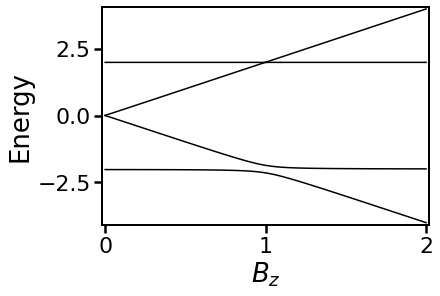

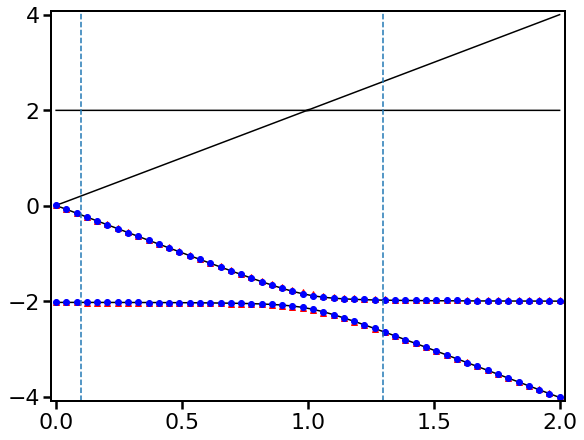

In [29]:
getting_EVC_data_forplots(filename = filename_evc_ibmqsim13,Bzmin=0.0,Bzmax=2, machine="ibmqsim",moretargets=True, write = True)
# getting_EVC_data_forplots(filename = filename_evc_bogota13,Bzmin=0.0,Bzmax=2, machine="bogota",moretargets=True, write = True)
# getting_EVC_data_forplots(filename = filename_evc_manila13,Bzmin=0.0,Bzmax=2, machine="manila",moretargets=True, write = True)

# getting_EVC_data_forplots(filename = filename_evc_ibmqsim19,Bzmin=0.0,Bzmax=2, machine="ibmqsim",moretargets=True, write = True)
# getting_EVC_data_forplots(filename = filename_evc_montreal19,Bzmin=0.0,Bzmax=2, machine="montreal",moretargets=True, write = True)
# getting_EVC_data_forplots(filename = filename_evc_manila19,Bzmin=0.0,Bzmax=2, machine="manila",moretargets=True, write = True)

# getting_EVC_data_forplots(filename= filename_evc_manila13,Bzmin=-2,Bzmax=2, write = False)

In [4]:
from h2molecule import *

In [7]:
def getting_hydrogen_data_forplots( distlist_training = [0.1,1.6],distzmin=0.08, distmax=2.0,npointsexact=10,distzmintarget=0.09, distmaxtarget=1.9,npointstarget = 5, write = False):
    N = 2
    # distlist_training = [0.1,1.6]
    # distlist_training = [ 1.6,1.7]
    # distlist_training = [0.71, 0.74]
    training_paramlist = [[dist] for dist in distlist_training]
    # distlist_target = [0.735]
    distlist_target = np.linspace(distzmintarget,distmaxtarget,npointstarget)
    # distlist_target = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5]
    target_paramlist = [[dist] for dist in distlist_target]
    vectorspace = vector_methods(h2_hamiltonian)
    EVcontinuer = vector_continuer(vectorspace,
                                   h2_hamiltonian,
                                   Mag_op,
                                   training_paramlist,
                                   target_paramlist,
                                   N)

    EVcontinuer.get_base_eigenvectors()
    EVcontinuer.get_target_eigenvectors(ortho=False)
    # print("values in object before",EVcontinuer.target_evals)
    # if I don't use the copy function the object pointer will be passed and it messes up lets say when we add nuclear energies
    EVC_total_energies = np.copy(EVcontinuer.target_evals)
    nuclear_repulsion_energies=[]
    for ir, r in enumerate(distlist_target):
        h2temp = h2molecule(dist=r)
        h2temp.make_ham_matrix()
        h2temp.solve_for_energies()
        nuclear_repulsion_energies.append(h2temp.nuclear_repulsion_energy)
        EVC_total_energies[ir, :] = EVC_total_energies[ir, :] + h2temp.nuclear_repulsion_energy
    # print("values in object after", EVcontinuer.target_evals)
    # print("nuclear_repulsion_energies in main ",nuclear_repulsion_energies)
    fig, ax, distlist, eval_stor, eval_stor_tot = show_h2_spectrum(distzmin=distzmin, distmax=distmax,npoints=npointsexact)

    for b in distlist_training:
        ax[0].axvline(b)
        ax[1].axvline(b)
    for ip in range(len(training_paramlist)):
        ax[0].plot(distlist_target, np.real(EVcontinuer.target_evals[:, ip]) , 'o', color="b")
        ax[1].plot(distlist_target, np.real(EVC_total_energies[:, ip]), 'o', color="k")
        # ax[1].plot(distlist_target, np.real(EVcontinuer.target_evals[:, ip]) + nuclear_repulsion_energies[1], 'o', color="k")
    # for i in range(1):
    #     bottom_side = ax[i].spines["bottom"]

    # tag = "hydrogen_distlist_training"+ str(distlist_training) + "distlist_target" + str(distlist_target)
    # fignamepdf = "plots/hydrogen/" + tag + ".pdf"
    # fig.savefig(fignamepdf)
    # fignamepng = "plots/hydrogen/" + tag + ".png"
    # fig.savefig(fignamepng)
    if(write):
        data_exact = np.array([distlist,eval_stor_tot[:,0],eval_stor_tot[:,1],eval_stor_tot[:,2], eval_stor_tot[:,3]])
        data_exact = data_exact.T
        filenameExact="paper_figures/plot_data/hydrogen_Exact_distvstotE_dist"+str(distzmin)+"to"+str(distmax)+"_npoints="+str(npointsexact)+".dat"
        np.savetxt(filenameExact, data_exact, fmt=['%f','%f','%f','%f','%f'])
        
        data_exact = np.array([distlist,eval_stor[:,0],eval_stor[:,1],eval_stor[:,2],eval_stor[:,3]])
        data_exact = data_exact.T
        filenameExact="paper_figures/plot_data/hydrogen_Exact_distvselecE_dist"+str(distzmin)+"to"+str(distmax)+".dat"
        np.savetxt(filenameExact, data_exact, fmt=['%f','%f','%f','%f','%f'])
            ####################
        data_ed = np.array([distlist_target,np.real(EVC_total_energies[:,0]),np.real(EVC_total_energies[:,1])])
            # print(EVcontinuer.target_evals[:,0],EVcontinuer.target_evals[:,1])
        data_ed  = data_ed.T
        filenameed="paper_figures/plot_data/hydrogen_ed_distvstotE_disttraining="+str(distlist_training)+"lentarget="+str(len(distlist_target)) +".dat"
        np.savetxt(filenameed, data_ed, fmt=['%f','%f','%f'])
        
        data_ed = np.array([distlist_target,np.real(EVcontinuer.target_evals[:,0]),np.real(EVcontinuer.target_evals[:,1])])
            # print(EVcontinuer.target_evals[:,0],EVcontinuer.target_evals[:,1])
        data_ed  = data_ed.T
        filenameed="paper_figures/plot_data/hydrogen_ed_distvselecE_disttraining="+str(distlist_training)+"lentarget="+str(len(distlist_target)) +".dat"
        np.savetxt(filenameed, data_ed, fmt=['%f','%f','%f'])
        #####################
        
        energylist_elect_training = []
        energylist_tot_training = []
#         EVcontinuer_training = vector_continuer(vectorspace,
#                                    h2_hamiltonian,
#                                    Mag_op,
#                                    training_paramlist,
#                                    training_paramlist,
#                                    N)

#         EVcontinuer_training.get_base_eigenvectors()
#         EVcontinuer_training.get_target_eigenvectors(ortho=False)
#         # print("values in object before",EVcontinuer.target_evals)
#         # if I don't use the copy function the object pointer will be passed and it messes up lets say when we add nuclear energies
#         EVC_total_energies_training = np.copy(EVcontinuer_training.target_evals)
        for ir, r in enumerate(distlist_training):
            h2temp = h2molecule(dist=r)
            h2temp.make_ham_matrix()
            h2temp.solve_for_energies()
            # nuclear_repulsion_energies_training.append(h2temp.nuclear_repulsion_energy)
            energies = np.linalg.eigvalsh(h2temp.ham)
            energylist_elect_training.append( energies[0])
            energylist_tot_training.append(energies[0] + h2temp.nuclear_repulsion_energy)
            
        
        data_tr = np.array([distlist_training,energylist_elect_training, energylist_tot_training])
        data_tr  = data_tr.T
        filenametr="paper_figures/plot_data/hydrogen_training"+str(distlist_training)+".dat"
        np.savetxt(filenametr, data_tr, fmt=['%f','%f','%f'])
            
        

[1.6]
Adding vector for parameter set [1.6]
[1.7]
Adding vector for parameter set [1.7]

basis continuer:
[ 0.        +0.00000000e+00j  0.91824102-7.61598617e-19j
 -0.396022  -5.49590924e-18j  0.        +0.00000000e+00j]
[ 0.        +0.00000000e+00j -0.90022188-1.97074730e-18j
  0.43543148-5.28747249e-18j  0.        +0.00000000e+00j]
overlap_matrix_continuer:
  [[ 1.       +0.00000000e+00j -0.9990611+1.99181856e-18j]
 [-0.9990611-1.99181856e-18j  1.       +0.00000000e+00j]]
Hamiltonian_continuer:
  [[-2.04718715+1.12659867e-16j  1.98472978-9.78676667e-17j]
 [ 1.98472978+9.78676667e-17j -1.92047501+1.07203040e-16j]]
fullvec
[ 0.        +0.00000000e+00j -0.99929132+2.60340460e-16j
  0.03764122+6.02242064e-16j  0.        +0.00000000e+00j]
overlap_matrix_continuer:
  [[ 1.       +0.00000000e+00j -0.9990611+1.99181856e-18j]
 [-0.9990611-1.99181856e-18j  1.       +0.00000000e+00j]]
Hamiltonian_continuer:
  [[-2.0440329 +2.25837916e-17j  1.98221183-1.15357495e-17j]
 [ 1.98221183+1.15357495e-1

/home/akhil/Dropbox/Kemper_Lab/Project_12_EigenVector_Continuation/gitcode/EigenvectorContinuation_version2/h2molecule.py:36: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  fig.subplots_adjust(hspace=.0)


Equillibrium dist ~  0.8099999999999999


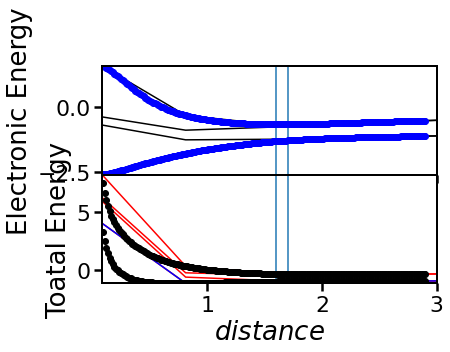

In [10]:
# getting_hydrogen_data_forplots( distzmin=0.08, distmax=2.0, npoints = 10, write = True )
# getting_hydrogen_data_forplots( distlist_training = [0.1,1.6],distzmin=0.08, distmax=2.0,npointsexact=100,npointstarget = 5,  write = True )
# getting_hydrogen_data_forplots( distlist_training =  [ 1.6,1.7],distzmin=0.08, distmax=2.0,npointsexact=100,npointstarget = 5,  write = True )

# getting_hydrogen_data_forplots( distlist_training = [0.1,1.6],distzmin=0.08, distmax=2.0,npointsexact=5,npointstarget = 25,  write = True )
# getting_hydrogen_data_forplots( distlist_training =  [ 1.6,1.7],distzmin=0.08, distmax=2.0,npointsexact=5,npointstarget = 25,  write = True )


# getting_hydrogen_data_forplots( distlist_training = [0.1,1.6],distzmin=0.08, distmax=2.0,npointsexact=200,npointstarget = 50,  write = True )
# getting_hydrogen_data_forplots( distlist_training =  [ 1.6,1.7],distzmin=0.08, distmax=2.0,npointsexact=5,npointstarget = 50,  write = True )

# getting_hydrogen_data_forplots( distlist_training = [0.1,1.6],distzmin=0.08, distmax=3.0,distmaxtarget=2.9,npointsexact=400,npointstarget = 200,  write = True )
getting_hydrogen_data_forplots( distlist_training =  [ 1.6,1.7],distzmin=0.08, distmax=3.0,distmaxtarget=2.9,npointsexact=5,npointstarget = 200,  write = True )

# getting_hydrogen_data_forplots( distlist_training =  [ 1.6,1.7],distzmin=-1.5, distmax=2.0,npointsexact=25,npointstarget = 2,  write = False )
# getting_hydrogen_data_forplots( distlist_training =  [ 1.6,1.7],distzmin=-1.5, distmax=2.0, npointsexact=200, distzmintarget=-1.4, distmaxtarget=1.9, npointstarget = 100,  write = True )
# getting_hydrogen_data_forplots( distlist_training = [0.1,1.6],distzmin=-1.5, distmax=2.0, npointsexact=5, distzmintarget=-1.4, distmaxtarget=1.9, npointstarget = 100,  write = True )

In [20]:
def getting_XXZ_data_forplots( write = False):
        # Bz = 0.01
    Bz=0.0
    Bx = 0.0
    N = 4
    pbc = True
    # Jz = 1
    # Jmin = -4.0
    # Jmax = 4.0
    J = 1
    Jzmin = 0.0
    Jzmax = 2.0


    # fig, ax, Jlist, eval_stor = show_XXZ_spectrumwithJ(Jmin=Jmin,Jmax=Jmax,Jz=Jz,Bx=Bx,Bz=Bz,pbc=pbc,N=N)
    fig, ax, Jzlist, eval_stor = show_XXZ_spectrumwithJz(Jzmin=Jzmin, Jzmax=Jzmax, J=J, Bx=Bx, Bz=Bz, pbc=pbc, N=N)
    # Set up training parameter sets for eigenvector continuer
    # Jlist_training = [0.7, 1.4]
    # training_paramlist = [[J, Jz, Bx, Bz, N, pbc] for J in Jlist_training]
    # Jzlist_training = [0.0, 2.0]
    Jzlist_training = [0.2,0.4 ,1.2]
    training_paramlist = [[J, Jz, Bx, Bz, N, pbc] for Jz in Jzlist_training]
    # _qc for passing parameters to the quantum circuit, because I prefer dictionaries than lists
    # training_paramlist_qc = [{"J": J, "Bx": Bx, "Bz": Bz, "N": N, "pbc": pbc} for J in Jlist_training]

    # if 'ax' in locals():
    #     for b in Jlist_training:
    #         ax.axvline(b)

    if 'ax' in locals():
        for b in Jzlist_training:
            ax.axvline(b)

    # Set up target parameter sets for eigenvector continuer
    # Jlist_target = [ 0.2,0.5,0.8,0.9,1.2,1.5,1.7]
    # Jlist_target = [-0.2, -0.5, -0.8, -0.9, -1.2, -1.5, -1.7]
    # target_paramlist = [[J, Jz, Bx, Bz, N, pbc] for J in Jlist_target]
    # Jzlist_target = [0.1, 0.3, 0.5, 0.7,0.9,1.1, 1.3, 1.5, 1.7,1.9]
    Jzlist_target = np.linspace(0.1,1.9,30)
    target_paramlist = [[J, Jz, Bx, Bz, N, pbc] for Jz in Jzlist_target]
    # target_paramlist_qc = [{"J": J, "Bx": Bx, "Bz": Bz, "N": N, "pbc": pbc} for J in Jlist_target]
    #################### INPUT parameters over ######################################

    # Object that knows how to deal with the various operations needed
    vectorspace = vector_methods(XXZ_hamiltonian)
    EVcontinuer = vector_continuer(vectorspace,
                                   XXZ_hamiltonian,
                                   Mag_op,
                                   training_paramlist,
                                   target_paramlist,
                                   N)
    EVcontinuer.get_base_eigenvectors()
    EVcontinuer.get_target_eigenvectors(ortho=False)

    if 'ax' in locals():
        for ip in range(len(training_paramlist)):
            # ax.plot(Jlist_target, np.real(EVcontinuer.target_evals[:, ip]), 'o', color="b")
            ax.plot(Jzlist_target, np.real(EVcontinuer.target_evals[:, ip]), '*', color="b")


    fignamepdf = "plots/XXZ/XXZ.pdf"
    fig.savefig(fignamepdf)
    fignamepng = "plots/XXZ/XXZ.png"
    fig.savefig(fignamepng)
    plt.show()

    if(write):
        data_exactlist = [Jzlist]
        frmt = ['%f']
        for i in range(2**N):
            data_exactlist.append(eval_stor[:,i])
            frmt.append('%f')
        data_exact = np.array(data_exactlist)
        # data_exact = np.array([Jzlist,eval_stor_tot[:,0],eval_stor_tot[:,1],eval_stor_tot[:,2], eval_stor_tot[:,3]])
        data_exact = data_exact.T
        filenameExact="paper_figures/plot_data/XXZ_Exact_energy"+str(Jzlist_training)+"_npoints="+str(100)+".dat"
        np.savetxt(filenameExact, data_exact, fmt=frmt)
        
        
            ####################
        data_edlist = [Jzlist_target]
        frmt = ['%f']
        for j in range(len(Jzlist_training)):
                data_edlist.append(np.real(EVcontinuer.target_evals[:,j]))
                frmt.append('%f')
        data_ed = np.array(data_edlist)
            # print(EVcontinuer.target_evals[:,0],EVcontinuer.target_evals[:,1])
        data_ed  = data_ed.T
        filenameed="paper_figures/plot_data/XXZ_ed_energy="+str(Jzlist_training)+"lentarget="+str(len(Jzlist_target)) +".dat"
        np.savetxt(filenameed, data_ed, fmt=frmt)
        
        #####################
        # vectorspace = vector_methods(XXZ_hamiltonian)
        EVcontinuertemp = vector_continuer(vectorspace,
                                   XXZ_hamiltonian,
                                   Mag_op,
                                   training_paramlist,
                                   training_paramlist,
                                   N)
        EVcontinuertemp.get_base_eigenvectors()
        EVcontinuertemp.get_target_eigenvectors(ortho=False)
        
        frmt = ['%f','%f']
        E_trlist = []
        for i in range(len(Jzlist_training)):
            E_trlist.append(np.real(EVcontinuertemp.target_evals[i,0]))
            # frmt.append('%f')
        data_trlist = [Jzlist_training,E_trlist]
        data_tr = np.array(data_trlist)
        data_tr  = data_tr.T
        filenametr="paper_figures/plot_data/XXZ_training"+str(Jzlist_training)+".dat"
        np.savetxt(filenametr, data_tr, fmt=frmt)
            
        

[1, 0.2, 0.0, 0.0, 4, True]
Adding vector for parameter set [1, 0.2, 0.0, 0.0, 4, True]
[1, 0.4, 0.0, 0.0, 4, True]
Adding vector for parameter set [1, 0.4, 0.0, 0.0, 4, True]
[1, 1.2, 0.0, 0.0, 4, True]
Adding vector for parameter set [1, 1.2, 0.0, 0.0, 4, True]

basis continuer:
[-0.00000000e+00+0.j -0.00000000e+00+0.j -0.00000000e+00+0.j
  3.65809814e-01+0.j  0.00000000e+00+0.j -4.82043939e-01+0.j
  3.65809814e-01+0.j  0.00000000e+00+0.j  0.00000000e+00+0.j
  3.65809814e-01+0.j -4.82043939e-01+0.j  6.04955013e-68+0.j
  3.65809814e-01+0.j -9.85039588e-68+0.j  6.04955013e-68+0.j
 -0.00000000e+00+0.j]
[-0.00000000e+00+0.j -0.00000000e+00+0.j -0.00000000e+00+0.j
  3.77496359e-01+0.j  0.00000000e+00+0.j -4.63673374e-01+0.j
  3.77496359e-01+0.j  0.00000000e+00+0.j  0.00000000e+00+0.j
  3.77496359e-01+0.j -4.63673374e-01+0.j  1.51774265e-66+0.j
  3.77496359e-01+0.j -2.83771409e-66+0.j  1.51774265e-66+0.j
 -0.00000000e+00+0.j]
[1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 

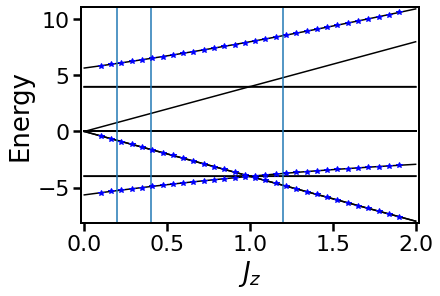

In [22]:
getting_XXZ_data_forplots( write = False)